In [108]:
import keras

# 問題1 全結合層のクラス化

In [243]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        
        
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.params = {}
        self.grads = {}
        self.W = self.initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = self.initializer.B(self.n_nodes2)
        self.params['W'] = self.W
        self.params['B'] = self.B
        self.X = None
        self.dW = np.zeros_like(self.W)
        self.dB = np.zeros_like(self.B)
        self.grads['W'] = self.dW
        self.grads['B'] = self.dB
        
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """        
        self.X = X
        A = np.dot(X,self.W) + self.B
        return A
    def backward(self, dA):#x=(N,D) w=(D,H),A=(N,H))
#         print('dAの値：', dA)
#         print('Xの値：', self.X)
        dZ = np.dot(dA, self.W.T)
        self.grads['W'][...] = np.dot(self.X.T, dA)
        self.grads['B'][...] = np.sum(dA,axis=0)
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # 更新
        self = self.optimizer.update(self)
        return dZ

# 問題2 初期化方法のクラス化

In [110]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = np.random.randn(n_nodes1, n_nodes2) * self.sigma
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        
        B = np.random.randn(n_nodes2,)
        return B

# 問題3 最適化手法のクラス化

In [234]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        grads = layer.grads
        for key in layer.params.keys():
            #print('勾配：', grads[key])
            layer.params[key] -= self.lr * grads[key]
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """

# 問題4 活性化関数のクラス化

In [112]:
class Sigmoid:
    
    def __init__(self):
        self.z = None
        
    def forward(self,x):
        z = 1 / (1 + np.exp(-x))
        self.z = z
        return z
    
    def backward(self,dout):
        return self.z * (1 - self.z) * dout
    

In [113]:
class SoftmaxWithLoss:
    def init(self):
        self.y = None
        self.t = None
    
    def forward(self,a,t):
        self.t = t
        a_max = np.max(a,axis=1).reshape(-1,1)
        a_exp = np.exp(a - a_max)
        a_sum = np.sum(a_exp,axis=1)
        y = a_exp / a_sum.reshape(-1,1)
        self.y = y
        
        loss = self.mean_cross_entropy(y,t)
        return loss
    
    def backward(self,dout=1):
        return (self.y - self.t) / len(self.t)
    
    def mean_cross_entropy(self,y,t,eps=1e-7):
        return - np.sum(t * np.log(y + eps)) / len(t)
        
    

# 問題5 ReLUクラスの作成

In [114]:
class ReLU:
    
    def __init__(self):
        self.X = None
        self.X_mask = None#0以下ならTrue
        
    def forward(self, X):
        self.X = X
        self.X_mask = self.X <= 0
        self.X[self.X_mask] = 0
        return self.X
    
    def backward(self,dout):
        dX = np.zeros_like(self.X)
        dX[~self.X_mask] = 1
        return dX * dout
        
        

# 問題6 重みの初期値

In [130]:
class XavierInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self,sigma):
        self.n_nodes1 = None
        self.sigma = sigma
    
    def W(self, n_nodes1, n_nodes2):
        self.n_nodes1 = n_nodes1
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = np.random.randn(n_nodes1, n_nodes2) / np.sqrt(n_nodes1)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        
        B = np.random.randn(n_nodes2,) / np.sqrt(self.n_nodes1)
        return B

In [169]:
class HeInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self,sigma):
        self.n_nodes1 = None
        self.sigma = sigma
        
    
    def W(self, n_nodes1, n_nodes2):
        self.n_nodes1 = n_nodes1
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = np.random.randn(n_nodes1, n_nodes2) * \
        np.sqrt(2 / n_nodes1)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        
        B = np.random.randn(n_nodes2,) * \
        np.sqrt(2 / self.n_nodes1)
        return B
        

# 問題7 最適化手法

In [154]:
class AdaGrad:
    """
    AdaGrad
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, alpha):
        self.alpha = alpha
        self.h = None
        
    def update(self, layer):
        
        batch_size = layer.X.shape[0]
        #print(batch_size,'batch_sizeの値')
        if self.h is None:
            self.h = {}
            for key, val in layer.params.items():
                self.h[key] = np.zeros_like(val)
        
        
        grads = layer.grads
        for key in layer.params.keys():
            #print('slef.hの形状：', self.h[key].shape)
            #print('grads[key]の形状', grads[key].shape)
            self.h[key] += (grads[key] / batch_size)** 2 
            layer.params[key] -= self.alpha * grads[key] /\
            (np.sqrt(self.h[key]) + 1e-7)
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """

# 問題8 クラスの完成

In [229]:
from collections import OrderedDict

class ScratchSimpleNeuralNetrowkClassifier:
    def __init__(self, input_shape, n_classes, n_nodes1, n_nodes2,
                 initializer,optimizer, sigma,opt_params):
        self.input_shape = input_shape
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.sigma = sigma 
        self.initializer = initializer(sigma)
        self.optimizer_1 = optimizer(**opt_params)
        self.optimizer_2 = optimizer(**opt_params)
        self.optimizer_3 = optimizer(**opt_params)
        #self.optimizer = optimizer(self.alpha, self.batch)
        self.layers = OrderedDict()
        self.layers['Affine1'] = FC(self.input_shape, self.n_nodes1,
                                   self.initializer, self.optimizer_1)
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = FC(self.n_nodes1, self.n_nodes2,
                                   self.initializer, self.optimizer_2)
        self.layers['Sigmoid2'] = Sigmoid()
        self.layers['Affine3'] = FC(self.n_nodes2, n_classes,self.initializer,
                                   self.optimizer_3)
        self.last_layer = SoftmaxWithLoss()
        
        
    def forward(self,X,y):
        
        for layer in self.layers.values():
            X = layer.forward(X)
            
        loss = self.last_layer.forward(X,y)
        return loss
    
    
    def backward(self,dout=1):
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
    
    def predict(self,X):
        for layer in self.layers.values():
            X = layer.forward(X)
        return np.argmax(X,axis=1)
        
        
    
    def accuracy(self,X,y):
        y_pred = self.predict(X)
        y = np.argmax(y,axis=1)
        print('y_pred: ', y_pred)
        print('y: ', y)
        return 100 * np.sum(y_pred == y) / len(y)

In [119]:
class Trainer:
    
    def __init__(self,model, n_epochs, batch):
        self.model = model
        self.n_epochs = n_epochs
        self.batch = batch
        self.loss_list = []
        
        
        
    def fit(self,X,y):
        
        for i in range(self.n_epochs):
            print('*********' + str(i+1) + 'エポック*********')
            get_mini_batch = GetMiniBatch(X, y, batch_size=20)
            count = 0
            for x_mini, y_mini in get_mini_batch:
                count += 1
                loss = self.model.forward(x_mini,y_mini)
                
                self.model.backward()
                if count == len(get_mini_batch):
                    self.loss_list.append(loss)
                    print('loss:',loss)
        

In [120]:
class GetMiniBatch:
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(np.int)
        #self.stopは作成するバッチサイズ数。１エポック分作成する
        
        
    def __len__(self):
        return self._stop
    
    #指定したバッチ番号を取ってきてくれる
    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0 : p1], self._y[p0 : p1]

    
    
    #batchカウンターを初期化する
    def __iter__(self):
        self._counter = 0
        return self
    
    #batchを前から一つずつ取ってくる
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0 : p1], self._y[p0 : p1]

# 問題9 学習と推定

In [128]:
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split


(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())
print(X_train.shape)
print(y_train.shape)


y_train_one_hot = to_categorical(y_train, num_classes=10)
print(y_train.shape)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(type(y_train_one_hot))


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot,
                                                 test_size=0.2)

1.0
0.0
(60000, 784)
(60000,)
(60000,)
(60000, 10)
float32
<class 'numpy.ndarray'>


In [132]:
model = ScratchSimpleNeuralNetrowkClassifier(input_shape=784,
                                            n_classes=10, n_nodes1=400,
                                             n_nodes2=200,sigma = 0.01,alpha=0.01,
                                             initializer=SimpleInitializer,
                                            optimizer=SGD)


trainer = Trainer(model,n_epochs=10,batch=20)
trainer.fit(X_train,y_train)
acc = model.accuracy(X_train,y_train)
print('acc: {}%'.format(acc))
# print(model.forward(X_train,y_train))
# print(model.backward())

*********1エポック*********
loss: 2.3014720213960294
*********2エポック*********
loss: 2.301267550348355
*********3エポック*********
loss: 2.3008746371006694
*********4エポック*********
loss: 2.3001700508115315
*********5エポック*********
loss: 2.2989032812804835
*********6エポック*********
loss: 2.296451395876331
*********7エポック*********
loss: 2.29073220116468
*********8エポック*********
loss: 2.2704867229647414
*********9エポック*********
loss: 2.1266280956703203
*********10エポック*********
loss: 1.7778825650693548
y_pred:  [1 1 0 ... 1 1 3]
y:  [1 1 6 ... 7 7 4]
acc: 29.26875%


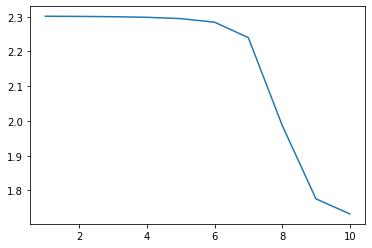

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(1,len(trainer.loss_list)+1), trainer.loss_list)

# 初期値をXavierに変更

In [140]:
model = ScratchSimpleNeuralNetrowkClassifier(input_shape=784,
                                            n_classes=10, n_nodes1=400,
                                             n_nodes2=200,sigma = 0.01,alpha=0.01,
                                             initializer=XavierInitializer,
                                            optimizer=SGD)


trainer_xavier = Trainer(model,n_epochs=10,batch=20)
trainer_xavier.fit(X_train,y_train)
acc = model.accuracy(X_train,y_train)
print('acc: {}%'.format(acc))
# print(model.forward(X_train,y_train))
# print(model.backward())

*********1エポック*********
loss: 1.9791667208585835
*********2エポック*********
loss: 1.0835579127179567
*********3エポック*********
loss: 0.7934600256218094
*********4エポック*********
loss: 0.6899630542413365
*********5エポック*********
loss: 0.619927094267915
*********6エポック*********
loss: 0.5647700401867237
*********7エポック*********
loss: 0.5227543145367559
*********8エポック*********
loss: 0.4906598690759755
*********9エポック*********
loss: 0.46559804865366256
*********10エポック*********
loss: 0.445562365594853
y_pred:  [1 1 6 ... 7 7 4]
y:  [1 1 6 ... 7 7 4]
acc: 90.1125%


In [160]:
trainer_xavier.loss_list

[1.9791667208585835,
 1.0835579127179567,
 0.7934600256218094,
 0.6899630542413365,
 0.619927094267915,
 0.5647700401867237,
 0.5227543145367559,
 0.4906598690759755,
 0.46559804865366256,
 0.445562365594853]

急速にlossが下がるようになった。

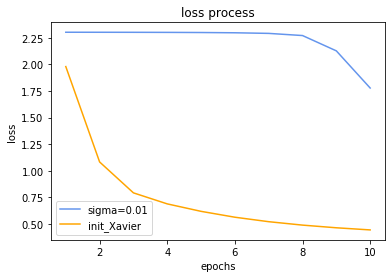

In [142]:
plt.plot(np.arange(1,len(trainer.loss_list)+1), trainer.loss_list,
        label='sigma=0.01',color='cornflowerblue')
plt.plot(np.arange(1,len(trainer_xavier.loss_list)+1),
        trainer_xavier.loss_list, label='init_Xavier',color='orange')
plt.title('loss process')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')


# オプティマイザをAdaGradに変更

In [157]:
model_ada = ScratchSimpleNeuralNetrowkClassifier(input_shape=784,
                                            n_classes=10, n_nodes1=400,
                                             n_nodes2=200,sigma = 0.01,alpha=0.0001,
                                             initializer=XavierInitializer,
                                            optimizer=AdaGrad)

trainer_ada = Trainer(model_ada,n_epochs=10,batch=20)
trainer_ada.fit(X_train,y_train)
acc = model_ada.accuracy(X_train,y_train)
print('acc: {}%'.format(acc))


*********1エポック*********
loss: 0.6547732597114131
*********2エポック*********
loss: 0.5500172497289717
*********3エポック*********
loss: 0.5005542878380451
*********4エポック*********
loss: 0.4689570717375539
*********5エポック*********
loss: 0.44586575692206826
*********6エポック*********
loss: 0.4276599875421373
*********7エポック*********
loss: 0.4125981265986963
*********8エポック*********
loss: 0.39972150086986524
*********9エポック*********
loss: 0.3884516806549525
*********10エポック*********
loss: 0.37841534802453514
y_pred:  [1 1 6 ... 7 7 4]
y:  [1 1 6 ... 7 7 4]
acc: 91.88333333333334%


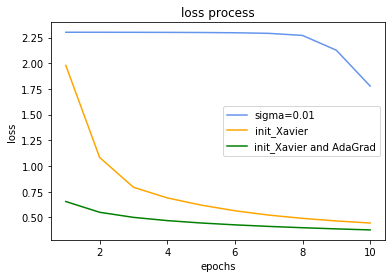

In [163]:
plt.plot(np.arange(1,len(trainer.loss_list)+1), trainer.loss_list,
        label='sigma=0.01',color='cornflowerblue')
plt.plot(np.arange(1,len(trainer_xavier.loss_list)+1),
        trainer_xavier.loss_list, label='init_Xavier',color='orange')
plt.plot(np.arange(1,len(trainer_ada.loss_list)+1),
        trainer_ada.loss_list, label='init_Xavier and AdaGrad',
         color='green')
plt.title('loss process')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')

# 活性化関数をReLUに変更

In [231]:
from collections import OrderedDict

class ScratchSimpleNeuralNetrowkClassifier_ReLUver:
    def __init__(self, input_shape, n_classes, n_nodes1, n_nodes2,
                 initializer,optimizer,sigma,opt_params):
        
        self.input_shape = input_shape
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.sigma = sigma 
#         self.alpha = alpha
        self.initializer = initializer(sigma)
        self.optimizer_1 = optimizer(**opt_params)
        self.optimizer_2 = optimizer(**opt_params)
        self.optimizer_3 = optimizer(**opt_params)
        #self.optimizer = optimizer(self.alpha, self.batch)
        self.layers = OrderedDict()
        self.layers['Affine1'] = FC(self.input_shape, self.n_nodes1,
                                   self.initializer, self.optimizer_1)
        self.layers['ReLU1'] = ReLU()
        self.layers['Affine2'] = FC(self.n_nodes1, self.n_nodes2,
                                   self.initializer, self.optimizer_2)
        self.layers['ReLU2'] = ReLU()
        self.layers['Affine3'] = FC(self.n_nodes2, n_classes,self.initializer,
                                   self.optimizer_3)
        self.last_layer = SoftmaxWithLoss()
        
        
    def forward(self,X,y):
        
        for layer in self.layers.values():
            X = layer.forward(X)
            
        loss = self.last_layer.forward(X,y)
        return loss
    
    
    def backward(self,dout=1):
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
    
    def predict(self,X):
        for layer in self.layers.values():
            X = layer.forward(X)
        return np.argmax(X,axis=1)
        
        
    
    def accuracy(self,X,y):
        y_pred = self.predict(X)
        y = np.argmax(y,axis=1)
        print('y_pred: ', y_pred)
        print('y: ', y)
        return 100 * np.sum(y_pred == y) / len(y)

In [251]:
model_ReLU = ScratchSimpleNeuralNetrowkClassifier_ReLUver(
                                            input_shape=784,
                                            n_classes=10, n_nodes1=400,
                                             n_nodes2=200,sigma = 0.01,
                                                opt_params={'alpha' : 0.01},
                                             initializer=HeInitializer,
                                            optimizer=AdaGrad)


trainer_ReLU = Trainer(model_ReLU,n_epochs=10,batch=20)
trainer_ReLU.fit(X_train,y_train)
acc = model_ReLU.accuracy(X_train,y_train)
print('acc: {}%'.format(acc))

*********1エポック*********
loss: 0.3018181853188321
*********2エポック*********
loss: 0.25265315380530257
*********3エポック*********
loss: 0.1861632105843541
*********4エポック*********
loss: 0.20514594992538004
*********5エポック*********
loss: 0.16143776323790177
*********6エポック*********
loss: 0.12476582245996878
*********7エポック*********
loss: 0.08467615545763266
*********8エポック*********
loss: 0.0770651298042095
*********9エポック*********
loss: 0.0399571862099821
*********10エポック*********
loss: 0.04332232946489848
y_pred:  [1 1 6 ... 7 7 4]
y:  [1 1 6 ... 7 7 4]
acc: 98.83541666666666%


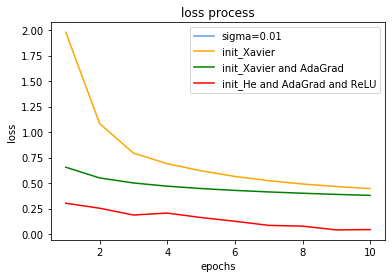

In [171]:
plt.plot(np.arange(1,len(trainer.loss_list)+1), trainer.loss_list,
        label='sigma=0.01',color='cornflowerblue')
plt.plot(np.arange(1,len(trainer_xavier.loss_list)+1),
        trainer_xavier.loss_list, label='init_Xavier',color='orange')
plt.plot(np.arange(1,len(trainer_ada.loss_list)+1),
        trainer_ada.loss_list, label='init_Xavier and AdaGrad',
         color='green')
plt.plot(np.arange(1,len(trainer_ReLU.loss_list)+1),
        trainer_ReLU.loss_list, label='init_He and AdaGrad and ReLU',
         color='red')
plt.title('loss process')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')

やること：
tanhを使ってみる。Adam,Momentumを使ってみる
BatchNormalizationを使ってみる。Dropoutを使ってみる

# モメンタムを使ってみる

In [244]:
class Momentum:
    
    def __init__(self,alpha,lr):
        self.alpha = alpha
        self.lr = lr
        self.v = None
        self.count = 1
        
    def update(self,layer):
        
        if self.v is None:
            self.v = {}
            for key,val in layer.params.items():
                self.v[key] = np.zeros_like(val)
        
        #print(str(self.count) +'回目の更新')
        self.count += 1
        #print('self.vの値：', self.v['W'])
        grads = layer.grads
        for key in layer.params.keys():
            self.v[key] = self.alpha * self.v[key] - grads[key]
            layer.params[key] += self.v[key]
            
        
    

In [264]:
#alpha=0.6 98.9%
#alpha=0.5 99.2%
#alpha=0.2 99.6%
#alpha=0.1 99.4%

model_mom = ScratchSimpleNeuralNetrowkClassifier(
                                            input_shape=784,
                                            n_classes=10, n_nodes1=400,
                                             n_nodes2=200,sigma = 0.01,
                                            initializer=XavierInitializer,
                                            optimizer=Momentum,
                                            opt_params = {'lr': 0.001, 'alpha' : 0.2})


trainer_mom = Trainer(model_mom,n_epochs=10,batch=20)
trainer_mom.fit(X_train,y_train)
acc = model_mom.accuracy(X_train,y_train)
print('acc: {}%'.format(acc))

*********1エポック*********
loss: 0.15293162961491422
*********2エポック*********
loss: 0.06042602903313339
*********3エポック*********
loss: 0.04788560587185723
*********4エポック*********
loss: 0.014843159898410119
*********5エポック*********
loss: 0.012135561073239251
*********6エポック*********
loss: 0.011943620373937489
*********7エポック*********
loss: 0.014643346456784289
*********8エポック*********
loss: 0.030347499943765805
*********9エポック*********
loss: 0.01215558261960387
*********10エポック*********
loss: 0.007166981137889707
y_pred:  [1 1 6 ... 7 7 4]
y:  [1 1 6 ... 7 7 4]
acc: 99.40208333333334%


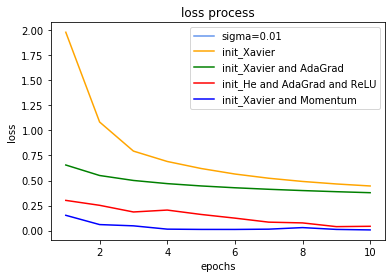

In [265]:
plt.plot(np.arange(1,len(trainer.loss_list)+1), trainer.loss_list,
        label='sigma=0.01',color='cornflowerblue')
plt.plot(np.arange(1,len(trainer_xavier.loss_list)+1),
        trainer_xavier.loss_list, label='init_Xavier',color='orange')
plt.plot(np.arange(1,len(trainer_ada.loss_list)+1),
        trainer_ada.loss_list, label='init_Xavier and AdaGrad',
         color='green')
plt.plot(np.arange(1,len(trainer_ReLU.loss_list)+1),
        trainer_ReLU.loss_list, label='init_He and AdaGrad and ReLU',
         color='red')
plt.plot(np.arange(1,len(trainer_mom.loss_list)+1),
        trainer_mom.loss_list, label='init_Xavier and Momentum',
         color='blue')
plt.title('loss process')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')

In [208]:
mom = Momentum(l)
print(type(mom))

<class '__main__.Momentum'>


In [192]:
test_dict = {'name' : 'たけし', 'age' : 4}
hello(**test_dict)

私は4才のたけしと言います


In [189]:
def hello(name,age):
    print('私は'  + str(age) + '才' + 'の' + name + 'と言います')

# Batch Normalizationを使ってみる

In [269]:
class BatchNormalization:
    
    def __init__(self, optimizer):
        self.optimizer = optimizer
        self.params = {}
        self.params['gamma'] = None
        self.params['beta'] = None
        self.grads = {}
        self.grads['gamma'] = None
        self.grads['beta'] = None
        
        self.mu = None
        self.std = None
        
        self.batch_size = None
        self.dmu = None
        self.dstd = None
        self.dxc = None
        
        
    def forward(self,X, eps=1e-7):
        self.batch_size = X.shape[0]
        if self.gamma is None:#(D,)
            N,D = X.shape
            self.params['gamma'] = np.ones(D)
        if self. beta is None:#(D,)
            self.params['beta'] = np.zeros(D)
         
        #mu:(D,)
        #sigma: (D,)
        #X_standard: (N,D)
        self.mu = np.mean(X,axis=0).reshape(1,-1)
        self.xc = X - self.mu
        self.var = np.mean(self.xc**2, axis=0)
        self.std = np.sqrt(self.var + 10e-7)
        self.xn = self.xc / self.std
        
        return self.params['gamma']* self.xn + \
    self.params['beta']
    
    def backward(self,dout):
        self.dbeta = np.sum(dout,axis=0)
        self.dgamma = np.sum(dout * xn, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        
        
        dmu = - dxc
        dx = dxc
        
        
        self = self.optimizer.update(self)
        
        
        
    
    